In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image  
#import pydotplus
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB 
from sklearn import svm
from scipy import stats 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from itertools import combinations 

# My Import
from datetime import date
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import math

# 1. Pre-Proccess

## 1.1. Acquiring The Data

In [2]:
data_frame = pd.read_csv('./Marketing_Campaign_Test.csv')
data_frame.head()

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue
0,5430,1956.0,Graduation,Together,54450.0,1.0,1.0,14/09/2012,0,454.0,...,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
1,8996,1957.0,PhD,Married,NaN,2.0,1.0,19/11/2012,4,230.0,...,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
2,8432,1956.0,Graduation,Together,NaN,1.0,1.0,14/09/2012,0,454.0,...,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
3,6566,1954.0,PhD,NaN,72550.0,1.0,1.0,08/11/2012,39,826.0,...,12.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
4,2552,1955.0,PhD,Single,55521.0,1.0,2.0,22/10/2013,11,416.0,...,6.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0


## 1.2. Dealing with Missing data

In [3]:
data_frame[data_frame.isnull().sum(axis=1)>1]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue
11,7187,1969.0,Master,Together,NaN,1.0,1.0,18/05/2013,52,375.0,...,4.0,6.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,11.0
42,10905,NaN,NaN,NaN,NaN,NaN,NaN,29/10/2012,7,194.0,...,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
125,11188,1957.0,Graduation,Together,26091.0,1.0,NaN,25/02/2014,84,15.0,...,3.0,10.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,11.0
194,3536,NaN,NaN,NaN,NaN,NaN,NaN,24/03/2013,65,7.0,...,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
355,10164,NaN,NaN,NaN,NaN,NaN,NaN,03/04/2014,75,1017.0,...,5.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,11.0
385,2326,NaN,NaN,NaN,NaN,NaN,NaN,16/02/2013,15,32.0,...,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
552,7617,1974.0,Graduation,Single,42373.0,1.0,1.0,15/08/2013,83,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553,7281,1959.0,PhD,Single,NaN,0.0,0.0,05/11/2013,80,81.0,...,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
559,4692,1976.0,Graduation,Married,7500.0,1.0,0.0,01/08/2012,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We noticed there are 2 rows without any data to help our model to predict response to the marketing campain due to missing values so we decided to drop these 2 rows

In [4]:
print(data_frame.loc[[552,559]])
data_frame.drop([552,559], axis=0, inplace=True)

       ID  Year_Birth   Education   Status   Income  Num_of_kids  Num_of_Teen  \
552  7617      1974.0  Graduation   Single  42373.0          1.0          1.0   
559  4692      1976.0  Graduation  Married   7500.0          1.0          0.0   

    Registration_date  Recency  Mnt_Fruits  ...  Num_Catalog_Purchases  \
552        15/08/2013       83         NaN  ...                    NaN   
559        01/08/2012       19         NaN  ...                    NaN   

     Num_Web_Visits  Response_Campaign_1  Response_Campaign_2  \
552             NaN                  NaN                  NaN   
559             NaN                  NaN                  NaN   

     Response_Campaign_3  Response_Campaign_4  Response_Campaign_5  Complain  \
552                  NaN                  NaN                  NaN       NaN   
559                  NaN                  NaN                  NaN       NaN   

     Cost_Contact  Revenue  
552           NaN      NaN  
559           NaN      NaN  

[2 rows 

### We will first deal with the catagorical information: 

#### Education

In [5]:
data_frame[data_frame['Education'].isnull()]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue
42,10905,NaN,NaN,NaN,NaN,NaN,NaN,29/10/2012,7,194.0,...,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
194,3536,NaN,NaN,NaN,NaN,NaN,NaN,24/03/2013,65,7.0,...,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
355,10164,NaN,NaN,NaN,NaN,NaN,NaN,03/04/2014,75,1017.0,...,5.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,11.0
385,2326,NaN,NaN,NaN,NaN,NaN,NaN,16/02/2013,15,32.0,...,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0


### As the rows with the missing catagorical information also doesnt contain any information providing information on the custumer thus helping our model, we decided to remove them.

In [6]:
data_frame.drop(data_frame.index[data_frame['Education'].isnull()], inplace = True)
data_frame[data_frame['Education'].isnull()]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue


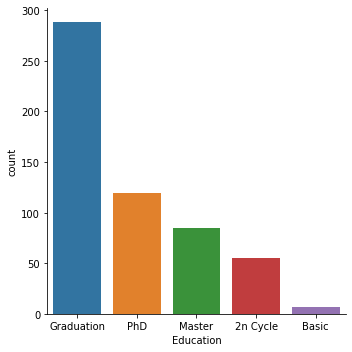

In [7]:
# Displaying the updated distribution
sns.catplot(x = 'Education', kind = 'count', data = data_frame)

#### Status

In [8]:
null_status_frame = data_frame[data_frame['Status'].isnull()]
null_status_frame

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue
3,6566,1954.0,PhD,NaN,72550.0,1.0,1.0,08/11/2012,39,826.0,...,12.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
83,2404,1976.0,Graduation,NaN,53359.0,1.0,1.0,27/05/2013,4,173.0,...,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
122,7300,1952.0,Graduation,NaN,69142.0,0.0,1.0,29/06/2014,50,448.0,...,7.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0
131,9909,1996.0,2n Cycle,NaN,7500.0,0.0,0.0,09/11/2012,24,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
231,4939,1946.0,Graduation,NaN,37760.0,0.0,0.0,31/08/2012,20,84.0,...,6.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
235,503,1985.0,Master,NaN,20559.0,1.0,0.0,12/03/2013,88,13.0,...,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
262,11100,1972.0,Graduation,NaN,51813.0,1.0,1.0,11/04/2013,37,51.0,...,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
270,9422,1989.0,Graduation,NaN,38360.0,1.0,0.0,31/05/2013,26,36.0,...,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
271,8601,1980.0,Graduation,NaN,80011.0,0.0,1.0,29/04/2013,3,421.0,...,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0
316,7829,1900.0,2n Cycle,NaN,36640.0,1.0,0.0,26/09/2013,99,15.0,...,2.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,11.0


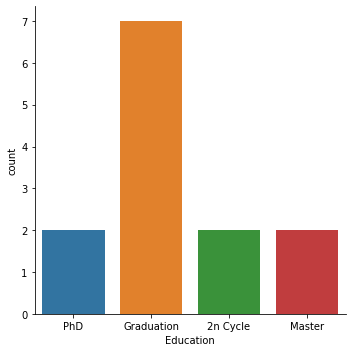

In [9]:
# Displaying the distribution for the custumers with missing status
sns.catplot(x = 'Education',kind = 'count', data = null_status_frame)

##### We can see there are 9 rows with missing Status information, but now we can see the other information on the custumer exists. We will check the correlation of Status with the other catagorical field - Education

In [10]:
group = data_frame.groupby('Education')
df2 = group.apply(lambda x: x['Status'].unique())
print(df2)

Education
2n Cycle             [Together, Married, Divorced, nan, Single]
Basic                               [Together, Single, Married]
Graduation    [Together, Divorced, Married, Single, nan, Widow]
Master        [Together, Married, Widow, Divorced, Single, nan]
PhD           [Married, nan, Single, Divorced, Together, Wid...
dtype: object


array([[<AxesSubplot:title={'center':'2n Cycle'}>,
        <AxesSubplot:title={'center':'Basic'}>],
       [<AxesSubplot:title={'center':'Graduation'}>,
        <AxesSubplot:title={'center':'Master'}>],
       [<AxesSubplot:title={'center':'PhD'}>, <AxesSubplot:>]],
      dtype=object)

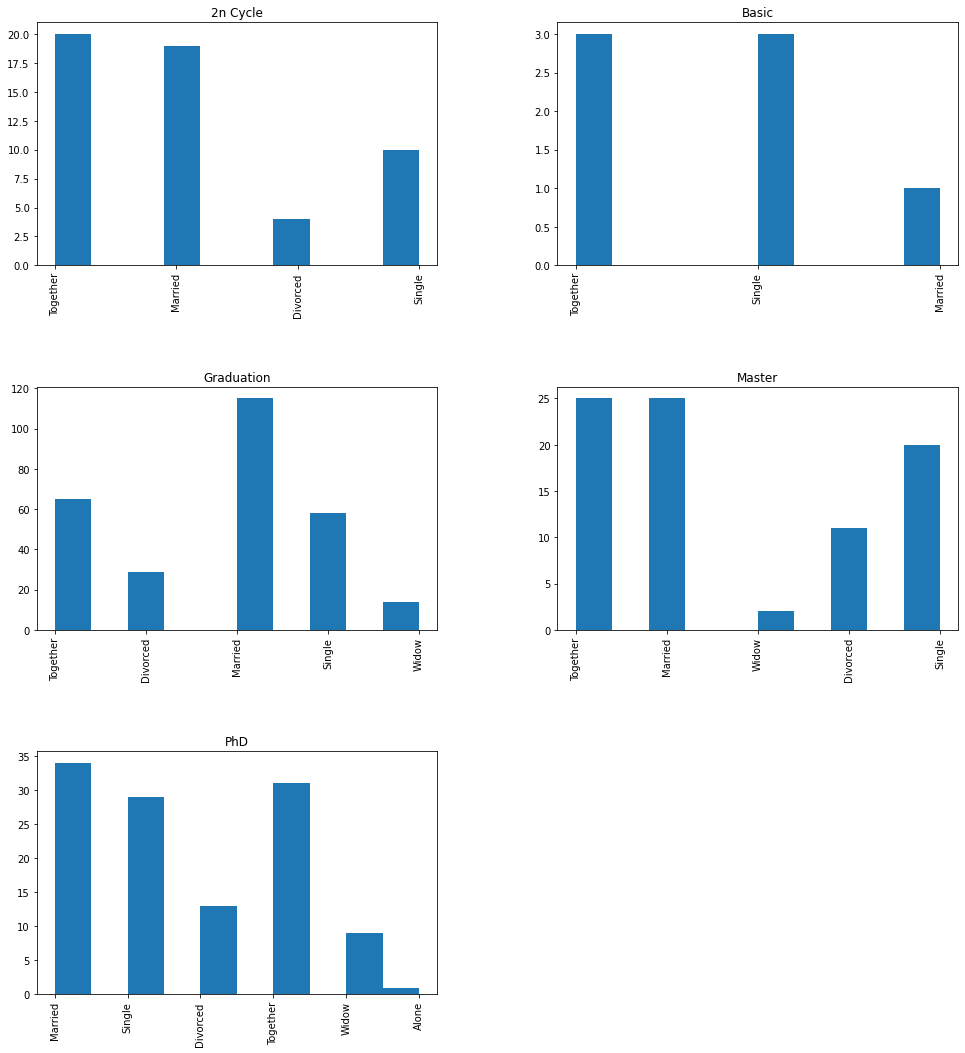

In [11]:
data_frame['Status'].hist(by=data_frame['Education'],  figsize = (16,18))

#### As we can see there is a max value for each education value regarding the status of the custumer

In [12]:
cond1 =  ((data_frame['Status'].isnull()) & (data_frame['Education'] == 'PhD'))
cond2 =  ((data_frame['Status'].isnull()) & (data_frame['Education'] == 'Master'))
cond3 =  ((data_frame['Status'].isnull()) & (data_frame['Education'] == 'Graduation'))
cond4 =  ((data_frame['Status'].isnull()) & (data_frame['Education'] == '2n Cycle'))

# PhD = Married
data_frame.loc[cond1 , 'Status'] = 'Married'

# Master = Married or toghater
data_frame.loc[cond2 , 'Status'] = 'Married'

# Graduation = Married
data_frame.loc[cond3 , 'Status'] = 'Married'

# 2nd Cycle = toghater
data_frame.loc[cond4 , 'Status'] = 'Together'

#### Handeling Null Income by inserting the median according to the Education value

In [13]:
mapping_dict = data_frame.groupby('Education')['Income'].median()
missing_mask = data_frame['Income'].isna()
print(missing_mask)
data_frame.loc[missing_mask, 'Income'] = data_frame.loc[missing_mask, 'Education'].map(mapping_dict)
for key in mapping_dict.keys():
    data_frame['Income'] = data_frame['Income'].fillna(mapping_dict[key])
# Check for any NA values left:
# print(data_frame['Income'].isnull().values.any())   

0      False
1       True
2       True
3      False
4      False
       ...  
554    False
555    False
556    False
557    False
558    False
Name: Income, Length: 554, dtype: bool


#### Cost_Contact

In [14]:
cost_median = (data_frame['Cost_Contact'].median())
print(f"The cost contact median is: {cost_median}")
data_frame['Cost_Contact'].fillna(cost_median,inplace=True)

The cost contact median is: 3.0


#### Response campain

In [15]:
col_filter = [col for col in data_frame if col.startswith('Response_C')]
for col in col_filter:
    data_frame[col].fillna(0,inplace=True)

#### Web perchases

In [16]:
column_1 = data_frame['Num_Web_Purchases']
column_2 = data_frame['Num_Web_Visits']
correlation = column_1.corr(column_2)
print(f"The correlation between Num_Web_Visits and Num_Web_Purchases is:{correlation}")
# We will fill in by median
webp_median = (data_frame['Num_Web_Purchases'].median())
print(f"The Num_Web_Purchases median is: {webp_median}")
data_frame['Num_Web_Purchases'].fillna(webp_median,inplace=True)

The correlation between Num_Web_Visits and Num_Web_Purchases is:0.37172926215296304
The Num_Web_Purchases median is: 2.0


#### Year of Birth

In [17]:
mapping_dict = data_frame.groupby('Education')['Year_Birth'].median()
missing_mask = data_frame['Year_Birth'].isna()
data_frame.loc[missing_mask, 'Year_Birth'] = data_frame.loc[missing_mask, 'Education'].map(mapping_dict)
for key in mapping_dict.keys():
    data_frame['Year_Birth'] = data_frame['Year_Birth'].fillna(mapping_dict[key])
# print(data_frame['Year_Birth'].isnull().values.any()) 

### Verify there is no more null values

In [18]:
data_frame.fillna(0,inplace=True)
data_frame[data_frame.isna().any(axis=1)]

,ID,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,...,Num_Catalog_Purchases,Num_Web_Visits,Response_Campaign_1,Response_Campaign_2,Response_Campaign_3,Response_Campaign_4,Response_Campaign_5,Complain,Cost_Contact,Revenue


## 1.3. Data-Representation

### Now we aim to change the data representation from catagorical to numeric

In [19]:
# Changing Status column to numeric values
data_frame['Status_num'] = 0
data_frame.loc[data_frame['Status'] == 'Alone', 'Status_num'] = 1
data_frame.loc[data_frame['Status'] == 'Single', 'Status_num'] = 2
data_frame.loc[data_frame['Status'] == 'Divorced', 'Status_num'] = 3
data_frame.loc[data_frame['Status'] == 'Married', 'Status_num'] = 4
data_frame.loc[data_frame['Status'] == 'Together', 'Status_num'] = 5
data_frame.loc[data_frame['Status'] == 'Widow', 'Status_num'] = 6

In [20]:
# Changing Education to numeric values
data_frame['Education_num'] = 0
data_frame.loc[data_frame['Education'] == 'Basic', 'Education_num'] = 1
data_frame.loc[data_frame['Education'] == 'Graduation', 'Education_num'] = 2
data_frame.loc[data_frame['Education'] == 'Master', 'Education_num'] = 3
data_frame.loc[data_frame['Education'] == '2n Cycle', 'Education_num'] = 4
data_frame.loc[data_frame['Education'] == 'PhD', 'Education_num'] = 5

#### Merging all the response campain into one column to see general response to any of the campains.

In [21]:
# Merging the Response_Campain_X into Responded
data_frame['Responded'] = 0
for i in ['1','2','3','4','5']:
    data_frame.loc[data_frame['Response_Campaign_'+ i] == 1  , 'Responded'] = 1
data_frame['Responded'].value_counts()

0    440
1    114
Name: Responded, dtype: int64

#### We can observe that only 114 custumers responded to any of the previous campains the marketing team conducted - a number we wish to improve.

In [22]:
# Convert year of birth value to Age
todays_date = date.today()
year=todays_date.year
Age = []
for value in data_frame['Year_Birth']:
    Age.append(year-value)
data_frame["Age"] = Age

In [23]:
# Merging all the Mnt_X columns into Mnt_Products
data_frame['Mnt_Products'] = 0
columns_list = ['Mnt_Fruits', 'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products','Mnt_Fish']
data_frame['Mnt_Products'] = data_frame[columns_list].sum(axis=1)
# data_frame.isnull()

#### Create new data frame of the wanted columns for our model

In [24]:
data_frame_model = data_frame[['ID', 'Age', 'Status_num', 'Education_num', 'Income', 'Num_of_kids', 'Num_of_Teen','Responded', 'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases', 'Num_Catalog_Purchases', 'Num_Web_Visits','Mnt_Products', 'Complain', 'Cost_Contact', 'Revenue','Mnt_Products' ,'Mnt_Fruits', 'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products','Mnt_Fish']].copy()
data_frame_model.to_csv('pre_proccessed_data.csv')

#### We Wish to re-build our data after the new represenation of certain columns and filter our some of the irrelevant ones

In [25]:
X = data_frame_model[['ID', 'Age', 'Status_num', 'Education_num', 'Income', 'Num_of_kids', 'Num_of_Teen','Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases', 'Num_Catalog_Purchases', 'Num_Web_Visits','Mnt_Products', 'Complain', 'Cost_Contact', 'Revenue','Mnt_Products' ,'Mnt_Fruits', 'Mnt_Meat', 'Mnt_sweet', 'Mnt_Wines', 'Mnt_Gold_Products','Mnt_Fish']]
y = data_frame_model['Responded']


## 1.2. Splitting the Data 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# 2 Decision Tree

## 2.1 Create Train and Predict

In [23]:
# Create Decision Tree classifer object
clf_tree = DecisionTreeClassifier(random_state=42) 

# Train Decision Tree Classifer 
clf_tree = clf_tree.fit(X_train,y_train)

# Predict the label
y_predict = clf_tree.predict(X_test)

# 2.2 Results

In [24]:
# Acuuracy
print("accuracy=",metrics.accuracy_score(y_test, y_predict))
# sensitivity
print("sensitivity=",metrics.recall_score(y_test, y_predict))
# precision
print("precision=" ,metrics.precision_score(y_test, y_predict))
# confusion - Optional
pd.DataFrame(metrics.confusion_matrix(y_test, y_predict))

accuracy= 0.7544910179640718
sensitivity= 0.3888888888888889
precision= 0.42424242424242425
accuracy= 0.7544910179640718
sensitivity= 0.3888888888888889
precision= 0.42424242424242425


,0,1
0,112,19
1,22,14


,0,1
0,112,19
1,22,14


## 2.3 Decision tree visualization

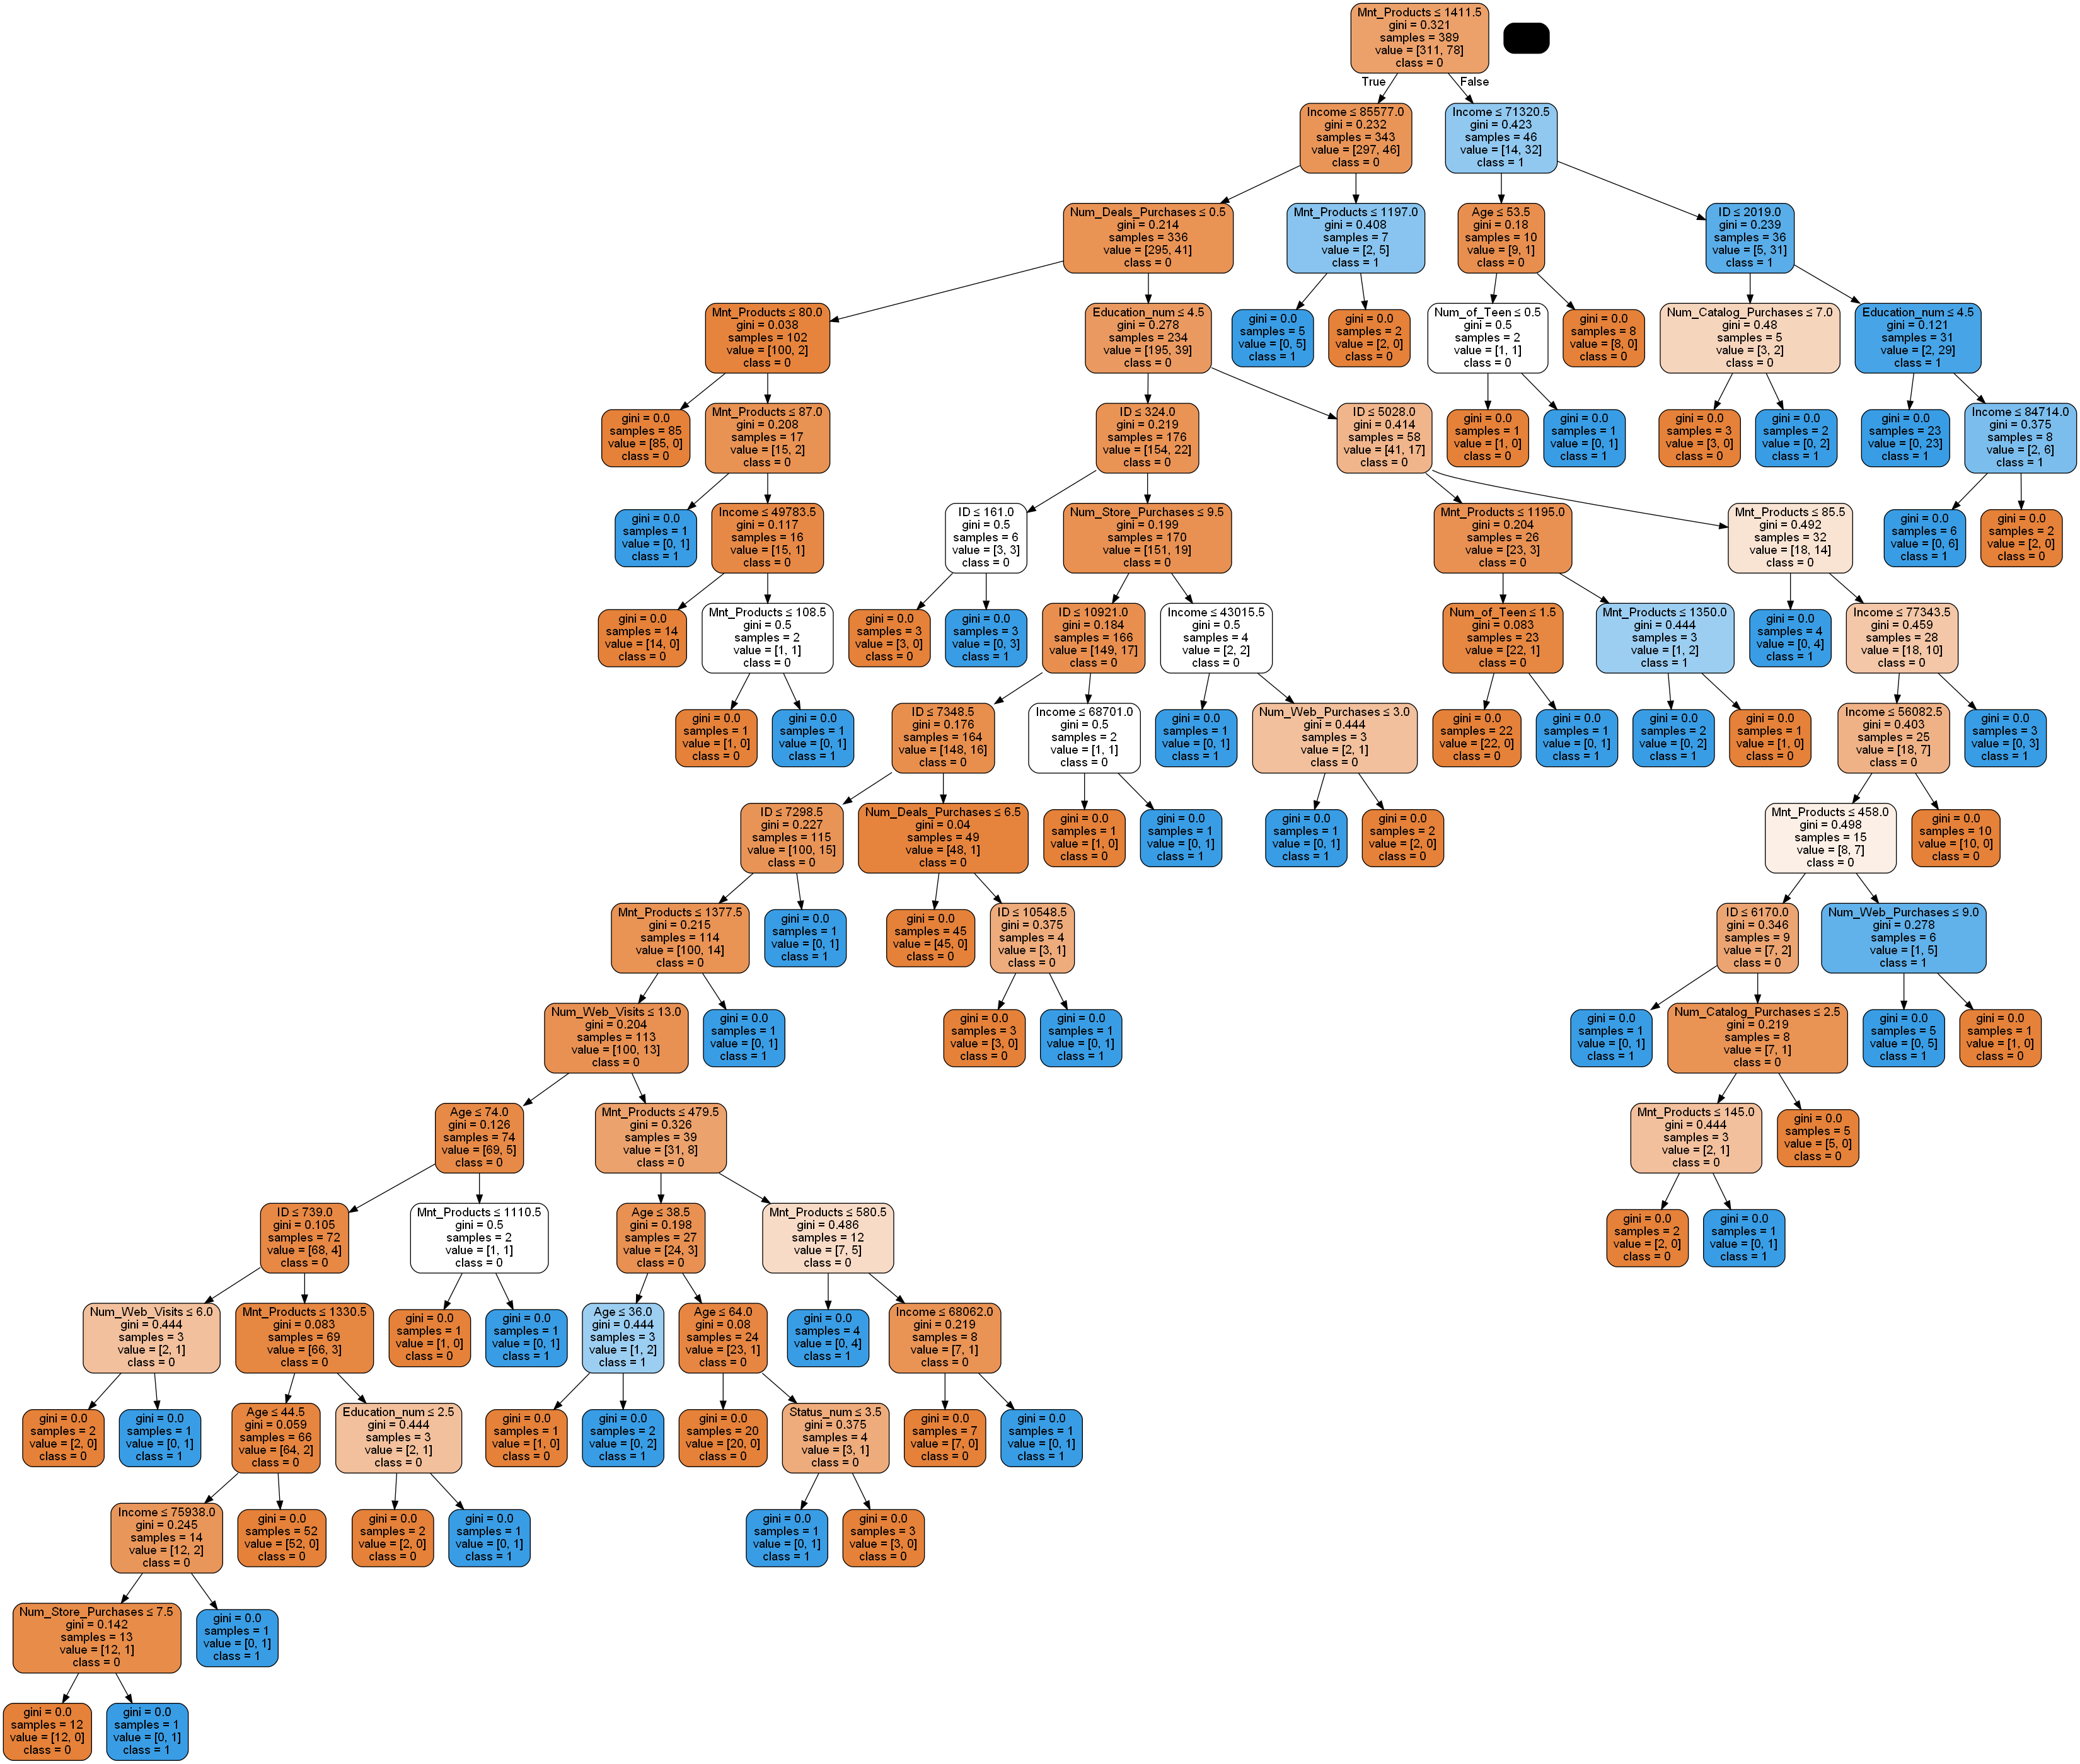

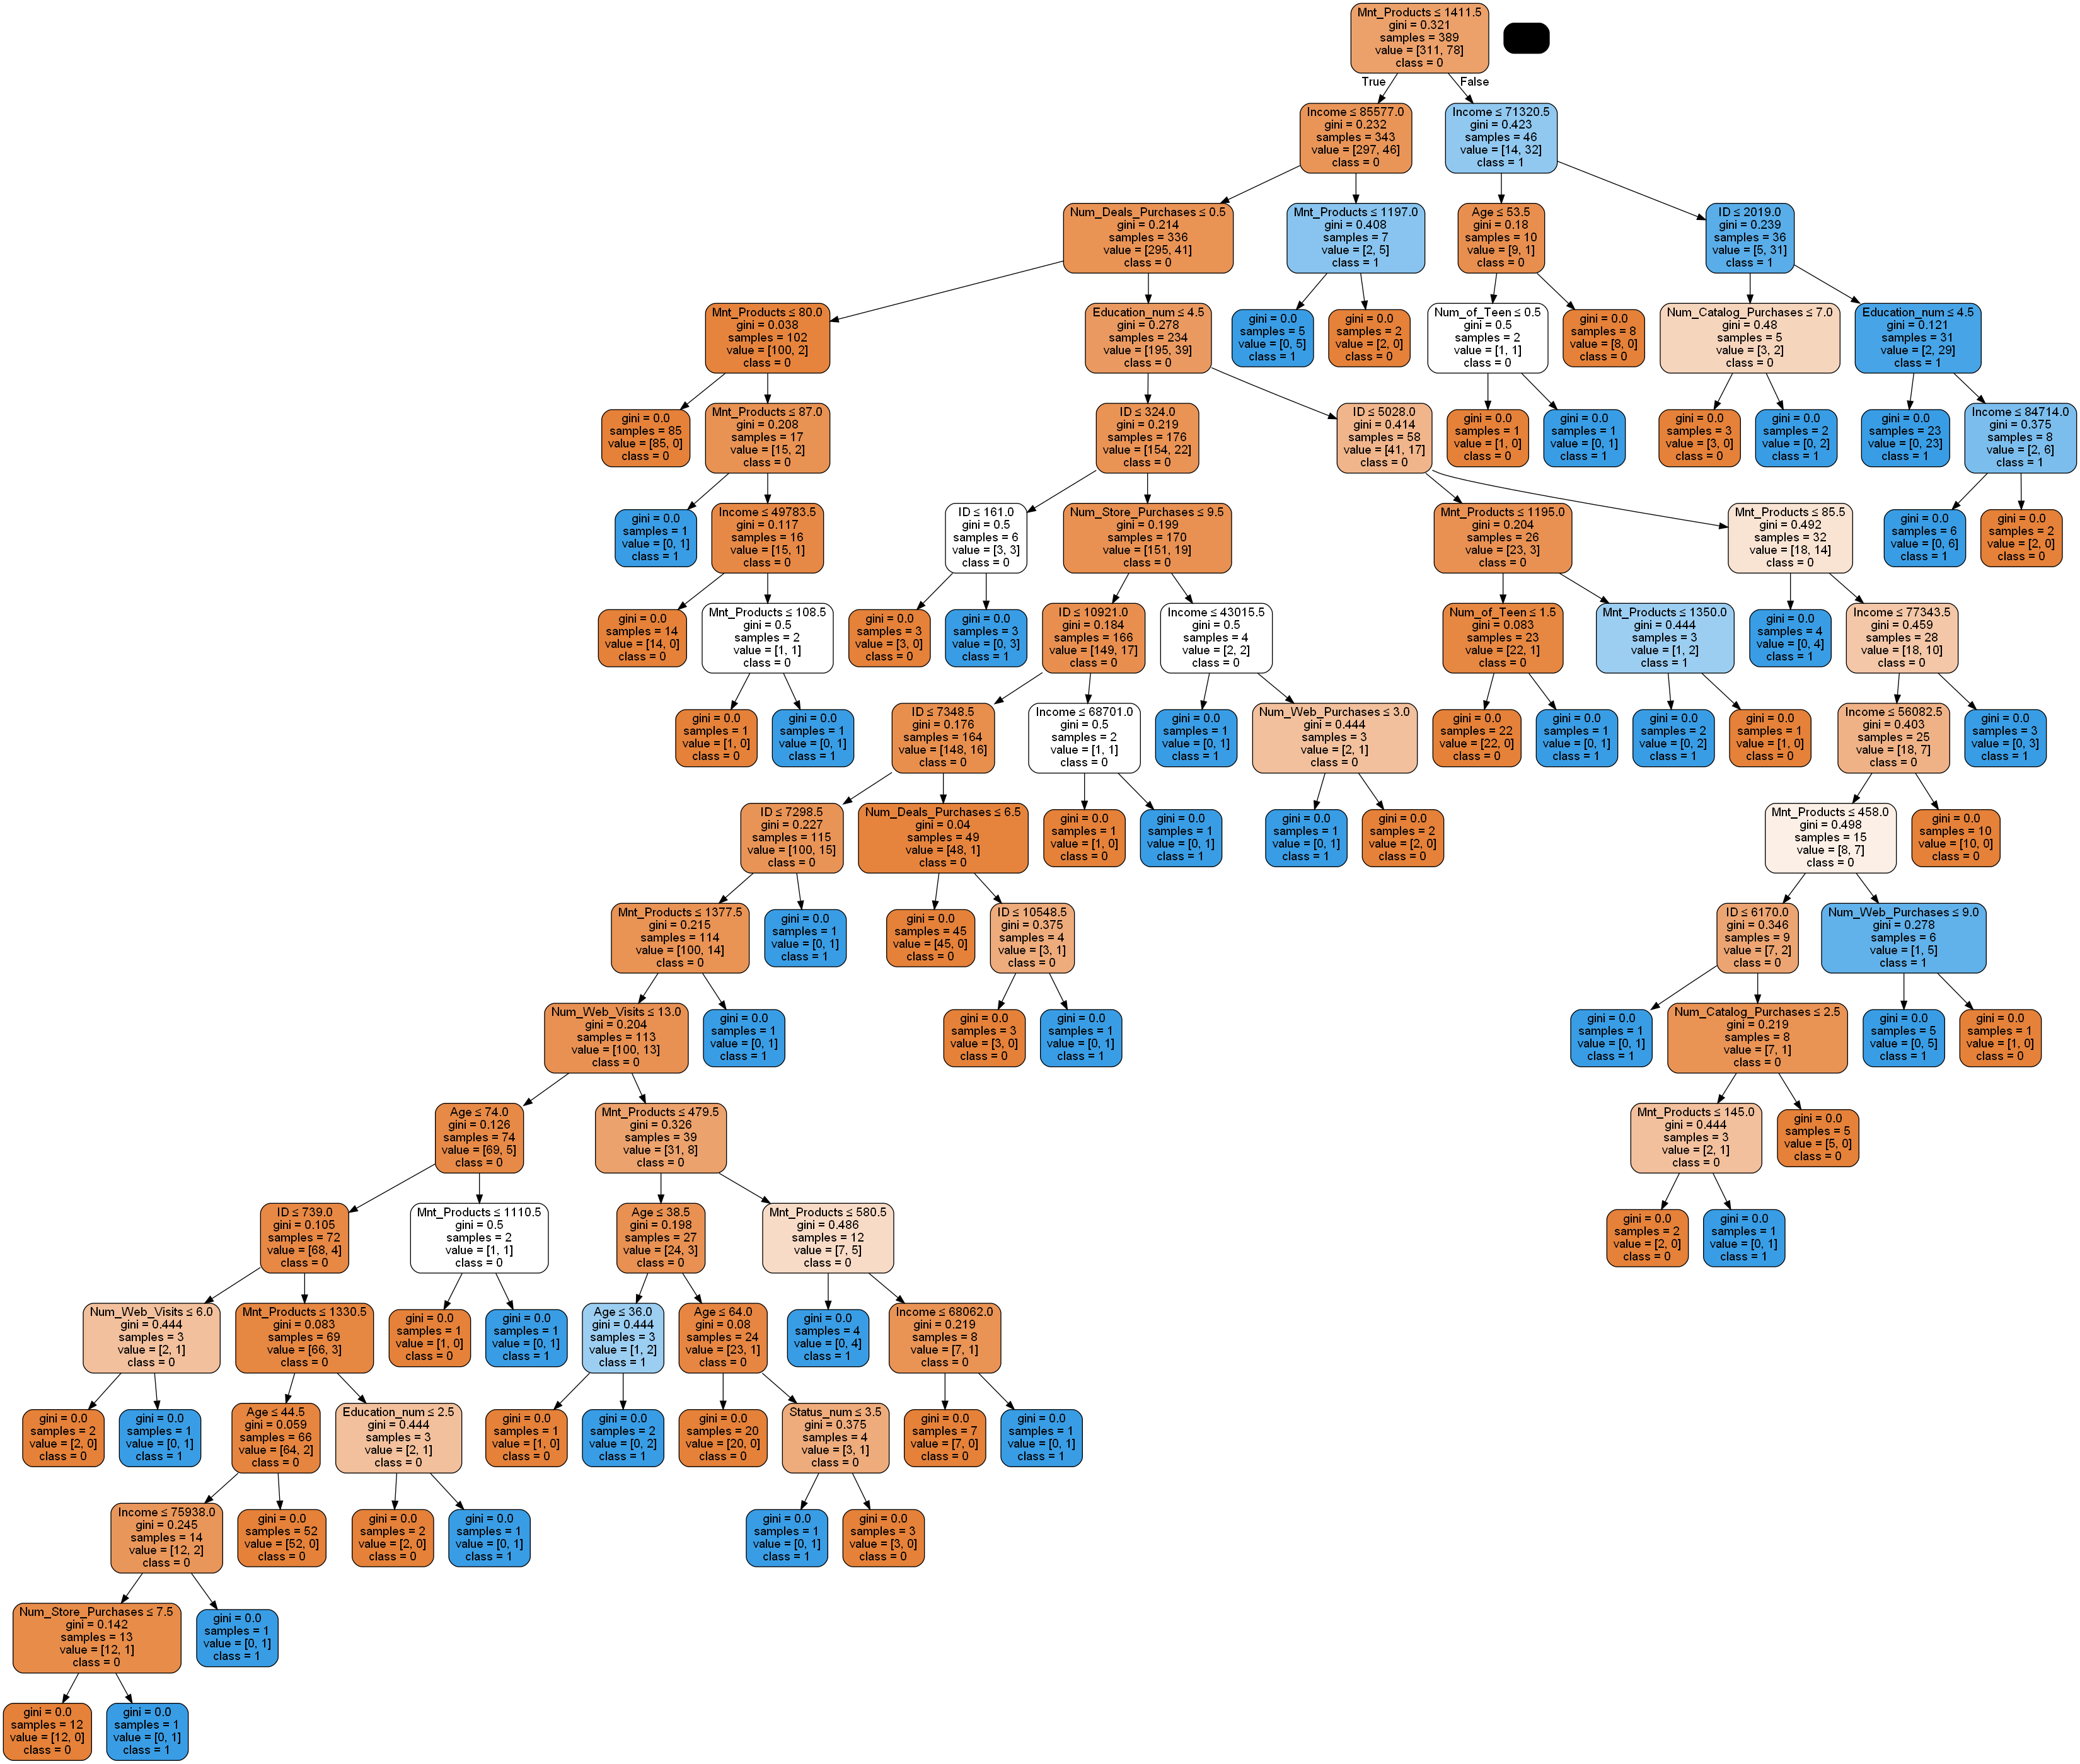

In [25]:
dot = export_graphviz(clf_tree, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree1.png')
Image(graph.create_png())

### Predict the labels for the train set

In [28]:
y_train_pred = clf_tree.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

1.0


,0,1
0,311,0
1,0,78


1.0


,0,1
0,311,0
1,0,78


### The acc score is 1.0 -- seems like overfitting that we need to handle

## 2.4 Overfitting handeling